<h6> 2020/2021 </h6>
<div align="left"><center>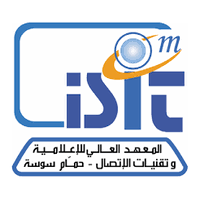</div>
<center>
<h1>  <center><font color=black>Fouille de Données</font></center> </h1>
<h1>  <center><font color=black>Classification des Tweets </font> </center> </h1>
<h2> <center><font color=black>Réalisé par Abouda Taysir</font> </center> </h2>
<h2> <center><font color=black>3DNI2</font> </center> </h2>
 

<b>Il s'agit d'un projet d'exploration de données Twitter pour avoir rapidement une idée globale des tweets sur un sujet d'actualité. Une analyse sentimentale des tweets est effectuée et les résultats sont représentés sous former de groupes de sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe.
voici les différents etapes pour exécuter le code:  <br>
1 . Extraction de l'API Twitter.<br>
2 . Appliquer les principes de nettoyage des données.<br>
3 . regrouper ensemble les tweets qui sont similaires.

In [14]:
#importations
import tweepy
from tweepy import API
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt
import csv
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import string
from string import punctuation
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#definition des clés
CONSUMER_KEY    = 'qnJJSNYVtX2Pugby2dJlopEax'
CONSUMER_SECRET = 'I2h09UnMxNEne5VYQD72Xs6tOrUY3yTtrODgFdo6nnYuK9eBfM'
ACCESS_TOKEN  = '1333914564946223104-B81eZinN9rd52GA2uxtFQ4u9Kf4iAI'
ACCESS_SECRET = '3q69HWI8BsfQCJyLlM0sqBZTpr8iQHerydBQyS4yhKDbS'

#authentication
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
#Configuration l'API importer de tweet
api = tweepy.API(auth,wait_on_rate_limit=True)

In [16]:
#stocker les tweets dans un fichier1 CSV
fichier1 ='tweets'+'.csv'
with open (fichier1, 'w', newline='',encoding="utf-8") as File:
    FileTab = csv.writer(File)
    FileTab.writerow(['Id','Tweet','Nom'])
    for tweet in tweepy.Cursor(api.search, q='Politics', lang = 'en').items(3000):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])
    for tweet in tweepy.Cursor(api.search, q='culture', lang = 'en').items(3500):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])
    for tweet in tweepy.Cursor(api.search, q='sport', lang = 'en').items(3500):
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        FileTab.writerow([tweet.id,tweets_decoded,tweet.user.name])

In [17]:
fichierTweet = pd.read_csv('tweets.csv')

In [18]:
fichierTweet.head(10000)

,Id,Tweet,Nom
0,1338849709876793344,RT @SPIRALlZE: unironically love when people j...,Basic Pack
1,1338849709721587712,RT @mrsubbbb: @Stfu_Anajai Two words for these...,☦︎ MERRY KACZYNSKIST🌲
2,1338849709188734976,RT @Shehzad_Ind: So AAP in Delhi notified the ...,Sagar
3,1338849708614283267,@Toddipedia @7Veritas4 @charliekirk11 And the ...,AbilityBlind
4,1338849705661325312,@AP_Politics @AP Cucks,Tom 🇺🇸
...,...,...,...
9995,1338837023415619586,RT @SkatingSchoolCH: Congratulations @Stephane...,🍍超mi🍍🥞🍯🐝
9996,1338837009876594688,@redsteeze I dunno. Didn’t one bad guy get som...,kw
9997,1338837003031482369,@Yep22589844 @Chairman951 @markgoldbridge You ...,John Coughlan
9998,1338836997763444738,Did you know that synchronized couch head turn...,Shannon Minter


In [19]:
fichierTweet.shape

(10000, 3)

In [21]:
## nettoyage des Tweets

In [22]:
import re
def clean_text(df,nom , tweet):
    df[tweet] = df[tweet].str.lower()
    df[tweet] = df[tweet].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|""|^rt|http.+?|([0-9])", "", x))

    
    df[nom] = df[nom].str.lower()
    df[nom] = df[nom].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|""|^rt|http.+?|([0-9])", "", x))
    return df

clean_tweets = clean_text(fichierTweet, 'Nom','Tweet')
clean_tweets.head(20)

,Id,Tweet,Nom
0,1338849709876793344,rt unironically love when people just lie lik...,basic pack
1,1338849709721587712,rt anajai two words for these cops weight room,merry kaczynskist
2,1338849709188734976,rt ind so aap in delhi notified the new farm l...,sagar
3,1338849708614283267,and the community organizer but we now hav...,abilityblind
4,1338849705661325312,politics cucks,tom
5,1338849704877166593,rt he departs as a disgrace he has shamed him...,bridget r
6,1338849704294055936,rt not everyone can handle me i am that fire ...,archana rkvian girl
7,1338849703987855362,presidentelect joe biden declared monday dec 1...,pontafujii
8,1338849702092009472,religious caste and gender discrimination an...,peacebub
9,1338849701756424193,rt the electoral college has affirmed preside...,s jones


In [26]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [27]:
mots_Politics = ''' government diplomatic law political aristotle politics diplomatical governance republic public administration
politician smooth suave state local government expedient sagacious police election political monarchy parliament dukes sovereign state
polity regime democratic ethics communism federation anarchism authoritarianism populism bland aristocracy tribe power negotiation
force warfare city clans tribes company country plato confucius latin kingship earls politically counts tribute lordship property inheritance
confiscation individualist allegiance espionage conspiracy treason jewish gentile convention observance celibacy pope taxation petition legislation majority
collegial permeates greek language flabby permeating communication commerce  governmental pervades permeated abstract straitjacket justice myopic
discernment curfew consciences revenue pervading pervade matriarchal numbed juridical rightness unaccountable clannish civilised transfigured deliberative
monopoly fatness paternalis mmonkish coin principle sinfulness perverted morass lawmaking'''

In [28]:
mots_Sport = '''racing competition athletics spectator sport game gymnastics basketball team sportsman cycling fun skating tennis soccer leisure football 
athletic games baseball sportswoman position play disport lark boast mutation frolic skylark romp gambol mutant feature  rugby union 
frisk cavort rollick offside call referee champion skiing riding ski rowing netball diversion coach athlete hockey athletes
entertainment olympic coaches polo outdoor sport team sport professional football business lead playing golftelevision chess
running go sportsperson sports sportaccord competitive club race gym youth challenge teams track super pleasure class event exercise
venue activity standards fitness son variation summercater tournament playoffs athleticism dexterity sumo line occupation wipeout
flip pass toss recreation aquatics row archery sledding equitation shot stroke foul possession judo save tuck shooter timekeeper
timer deficit average bout round turn surge seed curl start field shoot umpire drop down bandy submarine kick punt drive
racket carry dribble cut box hike mountaineer rappel backpack pack skate skateboard sled sleigh bob bobsled luge toboggan
scull canoe kayak paddle surf surfboard jackknife snorkel hurdle loose legal disqualified home away ineligible defending
onside underarm underhand underhanded overhand upfield humor humour wit witticism jocularity clowning comedy draughts
tradition goal funambulism birling logrollingoutclass double-team '''

In [29]:
mots_culture  = '''
society civilization philosophy anthropology subculture acculturation religion cultivation nationalism counterculture
cultural ideology art popular folklore agriculture country writing music monoculture cyberculture language
anthropology cooking literature science growth tillage grow ritual perfection development metaphor concept
symbol mythology gender tradition archaeology clothing traditions traditional western culture contemporary
multiculturalism elite politics ethnicity heritage sociology modernity spirituality marxism ethos nationality
humanism romanticism finish polish refinement civilisation traditionalism genetics human learning interaction kinship heredity
marriage dance technology shelter growing biology starter viticulture discernment content maturation appreciation ontogeny
archeology attitude taste letters institutions humanities acculturate jewelry flawlessness perceptiveness ontogenesis
viniculture meme modern capitalism clothes cultures social intellectual especially nature religious rooted
context cicero societies popular history literary roots important geography historical
folk particular origins phenomenon teleology ancient aspects perspective particularly rousseau architecture life inspired
liberalism influence landscape flourishing urban circles everyday refers foremost ideas aesthetics thriving indigenous
peoples such famous example known chinese describe nowadays community style knowledge unique prevalent describes environment classical
 today common originv interests great behavioral modernity most besides well beliefs importance emphasis kind understanding
themes genre regarded '''

In [30]:
politique = furnished(mots_Politics)
sport = furnished(mots_Sport)
culture = furnished(mots_culture)

In [31]:
##victoriser

In [32]:
'''Vectoriser les ensembles de mots, puis les standardiser. TFIDF sera utilisé afin de prendre en charge le moins
mots fréquents. La standardisation est parce que TFIDF favorise les phrases longues et il y aura des incohérences entre la longueur
des tweets et de la longueur des mots.'''


def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [33]:
vecteur_Politics = get_vectors(politique)
vecteur_Politics = get_vectors(sport)
vecteur_Politics = get_vectors(culture)

In [34]:
vecteur_Politics

array([[0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.14704292, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.14704292, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07352146, 0.07352146,
        0.07352146, 0.07352146, 0.07352146, 0.07

In [35]:
from scipy import stats
## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets =tv.fit_transform(fichierTweet.Tweet)
tfidf_tweets =tv.fit_transform(fichierTweet.Nom)

In [36]:
'''La similitude Jaccard est bonne pour les cas où la duplication n'a pas d'importance,
La similitude cosinus est bonne pour les cas où la duplication est importante lors de l'analyse de la similitude du texte. Pour deux descriptions de produits,
il vaudra mieux utiliser la similitude de Jaccard car la répétition d'un mot ne réduit pas leur similitude.'''

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [37]:
Score_Politics = get_scores(politique,fichierTweet.Tweet.to_list())
Score_Politics[-15:]

[0.6,
 0.5357142857142857,
 0.96,
 0.96,
 0.96,
 0.8076923076923077,
 0.7307692307692307,
 0.8148148148148148,
 0.96,
 0.75,
 0.96,
 0.84,
 0.88,
 0.6923076923076923,
 0.7142857142857143]

In [38]:
Score_Sport = get_scores(sport,fichierTweet.Tweet.to_list())
Score_Sport[-15:]

[0.5555555555555556,
 0.5,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.75,
 0.6785714285714286,
 0.7586206896551724,
 0.8888888888888888,
 0.7,
 0.8888888888888888,
 0.7777777777777778,
 0.8148148148148148,
 0.6428571428571429,
 0.6666666666666666]

In [39]:
Score_Culture = get_scores(culture,fichierTweet.Tweet.to_list())
Score_Culture[-15:]

[0.5555555555555556,
 0.5,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.75,
 0.6785714285714286,
 0.7586206896551724,
 0.8888888888888888,
 0.7,
 0.8888888888888888,
 0.7777777777777778,
 0.8148148148148148,
 0.7037037037037037,
 0.6666666666666666]

In [40]:
Nom_List=fichierTweet.Nom.to_list()

In [41]:
''''nouveau df avec les noms et les scores jaccard pour chaque groupe'''

data  = {'nom':Nom_List,'politique': Score_Politics, 'sport': Score_Sport, 'culture':Score_Culture}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,nom,politique,sport,culture
0,basic pack,0.880000,0.814815,0.814815
1,merry kaczynskist,0.720000,0.666667,0.666667
2,sagar,0.758621,0.709677,0.709677
3,abilityblind,0.807692,0.750000,0.814815
4,tom,0.400000,0.370370,0.370370
5,bridget r,0.760000,0.703704,0.703704
6,archana rkvian girl,0.920000,0.851852,0.851852
7,pontafujii,0.814815,0.758621,0.758621
8,peacebub,0.800000,0.740741,0.740741
9,s jones,0.920000,0.851852,0.851852


In [42]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3):
    pol = []
    sp = []
    cul = []
    for i, j, k in zip(l1, l2, l3):
        m = max(i, j, k)
        if m == i:
            pol.append(1)
        else:
            pol.append(0)
        if m == j:
            sp.append(1)
        else:
            sp.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)              
    return pol, sp, cul,

In [43]:
l1 = scores_df.politique.to_list()
l2 = scores_df.sport.to_list()
l3 = scores_df.culture.to_list()

pol, sp, cul = get_clusters(l1, l2, l3)

In [44]:
data = {'nom': Nom_List, 'politique':pol, 'sport':sp, 'culture':cul}
cluster_df = pd.DataFrame(data)
cluster_df.head(20)

,nom,politique,sport,culture
0,basic pack,1,0,0
1,merry kaczynskist,1,0,0
2,sagar,1,0,0
3,abilityblind,0,0,1
4,tom,1,0,0
5,bridget r,1,0,0
6,archana rkvian girl,1,0,0
7,pontafujii,1,0,0
8,peacebub,1,0,0
9,s jones,1,0,0


In [45]:
'''En raison de la similitude étroite entre les tweets économiques, sociaux et sanitaires, certains tweets ont plusieurs catégories,
donc pour faire attention que les lignes avec une somme> 1 devront partager les catégories. Après cela, le clustering prendra soin
des fractions '''


a =  cluster_df[['politique', 'sport', 'culture']].sum(axis = 1) > 1
c = cluster_df[['politique', 'sport', 'culture']].sum(axis = 1)
cluster_df.loc[(a), ['politique', 'sport', 'culture']] = 1/c

In [46]:
cluster_df.shape

(10000, 4)

In [47]:
#  Clustered DF

In [48]:
pivot_clusters = cluster_df.groupby(['nom']).sum()
pivot_clusters['politique'] = pivot_clusters['politique'].astype(int)
pivot_clusters['sport'] = pivot_clusters['sport'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['total'] = pivot_clusters['politique'] + pivot_clusters['sport'] + pivot_clusters['culture']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(8276, 4)


,politique,sport,culture,total
nom,,,,
zorka kelly,1,0,0,1
zote63,1,0,0,1
zufan wolde,1,0,0,1
zugly747,1,0,0,1
Total,8948,19,639,9606
